# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import itertools
# import math
# import pandas as pd
# import json
# import os
# import glob

# from joblib import Parallel, delayed
# import numpy as np
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# import seaborn as sns

# import screed
# import sklearn


# %matplotlib inline

In [ ]:
# Python standard library
import glob
import os

# Third-party libraries
# import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    jaccard_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

# import seaborn as sns

# Local python files
from path_constants import (
    FIGURE_FOLDER,
    DATA_FOLDER,
    ORPHEUM_BENCHMARKING_FOLDER,
    ORPHEUM_PIPELINE_RESULTS_FOLDER,
)
from nb_utils import describe, remove_rogue_tqdm

# Read concatenated scores for metrics

## All BUSCO Mammalia species from Lekha

In [4]:
%%time


has_stop_codon = "Translation frame has stop codon(s)"


parquet = os.path.join(ORPHEUM_PIPELINE_RESULTS_FOLDER, "coding_scores.parquet")
scores_for_metrics = pd.read_parquet(parquet, use_threads=True)
combined_scores = scores_for_metrics.query(
    '(category == "Non-coding") or (category == "Coding")'
)

# human_scores_for_metrics = human_scores_for_metrics.set_index('read_id_frame')
describe(combined_scores)

(664957994, 12)
--- First 5 entries ---


,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,species,is_coding,protein_id,uniprot_id
read_id_frame,,,,,,,,,,,,
read1000000/sp|Q9Y548|ENSP00000432266;mate1:298-447;mate2:308-457__frame=-3,read1000000/sp|Q9Y548|ENSP00000432266;mate1:29...,0.416667,24.0,Non-coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,26,mouse,False,sp|Q9Y548|ENSP00000432266,Q9Y548
read1000000/sp|Q9Y548|ENSP00000432266;mate1:298-447;mate2:308-457__frame=-3,read1000000/sp|Q9Y548|ENSP00000432266;mate1:29...,1.000000,21.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,dayhoff,29,mouse,True,sp|Q9Y548|ENSP00000432266,Q9Y548
read1000000/sp|Q9Y548|ENSP00000432266;mate1:298-447;mate2:308-457__frame=-3,read1000000/sp|Q9Y548|ENSP00000432266;mate1:29...,1.000000,42.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,dayhoff,8,mouse,True,sp|Q9Y548|ENSP00000432266,Q9Y548
read1000000/sp|Q9Y548|ENSP00000432266;mate1:298-447;mate2:308-457__frame=-3,read1000000/sp|Q9Y548|ENSP00000432266;mate1:29...,1.000000,25.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,dayhoff,25,mouse,True,sp|Q9Y548|ENSP00000432266,Q9Y548
read1000000/sp|Q9Y548|ENSP00000432266;mate1:298-447;mate2:308-457__frame=-3,read1000000/sp|Q9Y548|ENSP00000432266;mate1:29...,1.000000,40.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,dayhoff,10,mouse,True,sp|Q9Y548|ENSP00000432266,Q9Y548


CPU times: user 24min 23s, sys: 17min 8s, total: 41min 31s
Wall time: 19min 49s


In [5]:
# combined_scores = scores_for_metrics

## Plot distributions of jaccard/containment per species

### Point plot

In [6]:
# sns.pointplot?

In [7]:
mean_jaccards = combined_scores.groupby(['species', 'ksize']).jaccard_in_peptide_db.mean()
mean_jaccards_df = mean_jaccards.reset_index()
print(mean_jaccards_df.shape)

(486, 3)


In [8]:
describe(mean_jaccards_df)

(486, 3)
--- First 5 entries ---


,species,ksize,jaccard_in_peptide_db
0,baiji,5,0.285591
1,baiji,6,0.132067
2,baiji,7,0.050384
3,baiji,8,0.020477
4,baiji,9,0.008868


In [9]:
g = sns.catplot(
    data=mean_jaccards_df,
    x='ksize',
    y='jaccard_in_peptide_db',
    hue='species',
    hue_order=distance_from_human_mya.index,
    kind='point',
    palette='viridis',
    aspect=1.5,
)

NameError: name 'sns' is not defined

In [ ]:
combined_scores_k8 = combined_scores.query('ksize == 8')

In [ ]:
combined_scores_k8

### Boxenplots of jaccard distributions

In [ ]:
g = sns.catplot(
    data=combined_scores_k8,
    y='species',
    x='jaccard_in_peptide_db',
    order=distance_from_human_mya.index,
    kind='boxen',
    palette='viridis',
    height=6,
    aspect=.75,
#     alpha=0.8
#     markeredgecolor='lightgrey'
)

### Traditional BOX plots of jaccard distributions

In [ ]:
g = sns.catplot(
    data=combined_scores_k8,
    y='species',
    x='jaccard_in_peptide_db',
    order=distance_from_human_mya.index,
    kind='box',
    palette='viridis',
    height=6,
    aspect=.75,
#     alpha=0.8
#     markeredgecolor='lightgrey'
)

### stripplots of jaccard distributions

In [ ]:
g = sns.catplot(
    data=combined_scores_k8,
    y='species',
    x='jaccard_in_peptide_db',
    order=distance_from_human_mya.index,
    kind='strip',
    palette='viridis',
    height=6,
    aspect=.75,
)

In [ ]:
# g = sns.catplot(
#     data=combined_scores,
#     x='species',
#     y='jaccard_in_peptide_db',
#     order=distance_from_human_mya.index,
#     kind='point',
#     palette='viridis',
#     ci=None,
# )

In [ ]:
1+1

#### Point plot, `hue='is_coding'`

In [ ]:
g = sns.catplot(
    data=combined_scores,
    x='species',
    y='jaccard_in_peptide_db',
    order=distance_from_human_mya.index,
    kind='point',
    palette='Set2',
    hue='is_coding',
)

### Boxen plot

In [ ]:
# g = sns.catplot(
#     data=combined_scores,
#     x='species',
#     y='jaccard_in_peptide_db',
#     order=distance_from_human_mya.index,
#     kind='boxen',
#     palette='tab20',
# )

In [ ]:
g = sns.FacetGrid(data=combined_scores, hue='species', palette='Set2')
g.map(sns.distplot, 'jaccard_in_peptide_db')
g.add_legend()

In [ ]:
# Compute accuracy/F1 scores

## Human F1, accuracy, etc...scores

In [ ]:
%%time

score_names = 'accuracy', 'f1', 'jaccard', 'precision', 'recall',  


metrics = {
    'f1_score': sklearn.metrics.f1_score,
    'accuracy_score': sklearn.metrics.accuracy_score,
    'jaccard_score': sklearn.metrics.jaccard_score,
    'precision_score': sklearn.metrics.precision_score,
    'recall_score': sklearn.metrics.recall_score,
    'f2_score': lambda x, y: sklearn.metrics.fbeta_score(x, y, beta=2),
    'f_12_score': lambda x, y: sklearn.metrics.fbeta_score(x, y, beta=1/2),
}

def score_per_groupby(scorer, ground_truth, predicted, params):
    """Returns a dictionary with keys of params so they are included in the final dataframe"""
    return {params: scorer(ground_truth, predicted)}


def _score_parallel(grouped, is_coding_col, scorer, score_name, true_coding_frame, n_jobs=32):
    total = len(grouped)
    scores = pd.Series(Parallel(n_jobs=n_jobs)(
        delayed(score_per_groupby)(
            scorer, true_coding_frame[x.index], x, params
        ) 
        for params, x in tqdm(grouped[is_coding_col], total=total)
    ))
    scores.name = 'score_value'
    scores_df = scores.reset_index()
    scores_df['score_name'] = score_name
    return scores_df

def score_coding_metrics(
    coding_results, 
    true_coding_frame=true_coding_frame, 
    metrics=metrics, 
    is_coding_col='is_coding', 
    n_jobs=32, 
    groupby=['species', 'alphabet', 'ksize']
):

    dfs = []
    for score_name, scorer in metrics.items():
        print(f'score_name: {score_name}')
    #     scorer = sklearn.metrics.get_scorer(score_name)
        grouped = coding_results.groupby(groupby)
        scores_df = _score_parallel(grouped, is_coding_col, scorer, score_name, true_coding_frame, n_jobs=n_jobs)
#         scores = grouped[is_coding_col].apply(
#             lambda x: scorer(true_coding_frame[x.index], x))

#         scores.name = 'score_value'
#         scores_df = scores.reset_index()
#         scores_df['score_name'] = score_name
        dfs.append(scores_df)
    metrics_df = pd.concat(dfs)
    return metrics_df

In [83]:
1+2

3

In [84]:
remove_rogue_tqdm()

NameError: name 'combined_roc_curves' is not defined

In [85]:
%%time
remove_rogue_tqdm()
combined_metrics = score_coding_metrics(combined_scores, n_jobs=64)
print(combined_metrics.shape)
combined_metrics.head()

score_name: f1_score




  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 1/972 [04:12<68:05:55, 252.48s/it]

  0%|          | 2/972 [04:13<47:42:17, 177.05s/it]

  0%|          | 3/972 [04:14<33:26:44, 124.26s/it]

  0%|          | 4/972 [04:15<23:28:24, 87.30s/it] 

  1%|          | 5/972 [04:16<16:29:58, 61.43s/it]

  1%|          | 6/972 [04:17<11:37:22, 43.32s/it]

  1%|          | 7/972 [04:18<8:12:44, 30.64s/it] 

  1%|          | 8/972 [04:19<5:49:40, 21.76s/it]

  1%|          | 9/972 [04:20<4:09:43, 15.56s/it]

  1%|          | 10/972 [04:22<2:59:42, 11.21s/it]

  1%|          | 11/972 [04:23<2:10:44,  8.16s/it]

  1%|          | 12/972 [04:24<1:36:36,  6.04s/it]

  1%|▏         | 13/972 [04:25<1:12:42,  4.55s/it]

  1%|▏         | 14/972 [04:26<55:55,  3.50s/it]  

  2%|▏         | 15/972 [04:27<44:13,  2.77s/it]

  2%|▏         | 16/972 [04:28<35:59,  2.26s/it]

  2%|▏         | 17/972 [04:29<30:11,  1.90s/it]

  2%|▏         | 18/972 [04:30<26:09,  1.65s/it]

  2%|▏         | 19/972 [04

score_name: accuracy_score




  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 1/972 [04:42<76:12:27, 282.54s/it]

  0%|          | 2/972 [04:43<53:22:52, 198.12s/it]

  0%|          | 3/972 [04:44<37:23:51, 138.94s/it]

  0%|          | 4/972 [04:45<26:13:35, 97.54s/it] 

  1%|          | 5/972 [04:46<18:26:02, 68.63s/it]

  1%|          | 6/972 [04:47<12:57:57, 48.32s/it]

  1%|          | 7/972 [04:48<9:08:29, 34.10s/it] 

  1%|          | 8/972 [04:49<6:28:35, 24.19s/it]

  1%|          | 9/972 [04:50<4:36:44, 17.24s/it]

  1%|          | 10/972 [04:51<3:17:55, 12.34s/it]

  1%|          | 11/972 [04:52<2:23:22,  8.95s/it]

  1%|          | 12/972 [04:53<1:45:03,  6.57s/it]

  1%|▏         | 13/972 [04:54<1:18:03,  4.88s/it]

  1%|▏         | 14/972 [04:55<59:38,  3.74s/it]  

  2%|▏         | 15/972 [04:56<46:18,  2.90s/it]

  2%|▏         | 16/972 [04:57<37:05,  2.33s/it]

  2%|▏         | 17/972 [04:58<31:02,  1.95s/it]

  2%|▏         | 18/972 [04:59<25:57,  1.63s/it]

  2%|▏         | 19/972 [05

score_name: jaccard_score




  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 1/972 [03:40<59:27:03, 220.42s/it]

  0%|          | 2/972 [03:41<41:37:40, 154.50s/it]

  0%|          | 3/972 [03:41<29:09:52, 108.35s/it]

  0%|          | 4/972 [03:42<20:26:59, 76.05s/it] 

  1%|          | 5/972 [03:43<14:21:19, 53.44s/it]

  1%|          | 6/972 [03:43<10:05:37, 37.62s/it]

  1%|          | 7/972 [03:44<7:06:49, 26.54s/it] 

  1%|          | 8/972 [03:45<5:01:47, 18.78s/it]

  1%|          | 9/972 [03:45<3:34:22, 13.36s/it]

  1%|          | 10/972 [03:46<2:33:13,  9.56s/it]

  1%|          | 11/972 [03:47<1:50:28,  6.90s/it]

  1%|          | 12/972 [03:47<1:20:35,  5.04s/it]

  1%|▏         | 13/972 [03:48<59:39,  3.73s/it]  

  1%|▏         | 14/972 [03:49<45:02,  2.82s/it]

  2%|▏         | 15/972 [03:50<34:48,  2.18s/it]

  2%|▏         | 16/972 [03:50<27:37,  1.73s/it]

  2%|▏         | 17/972 [03:51<22:36,  1.42s/it]

  2%|▏         | 18/972 [03:52<19:07,  1.20s/it]

  2%|▏         | 19/972 [03:5

score_name: precision_score




  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 1/972 [03:34<57:49:47, 214.41s/it]

  0%|          | 2/972 [03:35<40:30:40, 150.35s/it]

  0%|          | 3/972 [03:36<28:24:07, 105.52s/it]

  0%|          | 4/972 [03:37<19:56:03, 74.14s/it] 

  1%|          | 5/972 [03:38<14:00:45, 52.17s/it]

  1%|          | 6/972 [03:38<9:52:17, 36.79s/it] 

  1%|          | 7/972 [03:39<6:58:30, 26.02s/it]

  1%|          | 8/972 [03:40<4:57:00, 18.49s/it]

  1%|          | 9/972 [03:41<3:32:01, 13.21s/it]

  1%|          | 10/972 [03:42<2:32:31,  9.51s/it]

  1%|          | 11/972 [03:43<1:51:02,  6.93s/it]

  1%|          | 12/972 [03:44<1:21:53,  5.12s/it]

  1%|▏         | 13/972 [03:45<1:01:37,  3.86s/it]

  1%|▏         | 14/972 [03:46<47:19,  2.96s/it]  

  2%|▏         | 15/972 [03:46<37:20,  2.34s/it]

  2%|▏         | 16/972 [03:47<30:31,  1.92s/it]

  2%|▏         | 17/972 [03:48<25:58,  1.63s/it]

  2%|▏         | 18/972 [03:49<21:45,  1.37s/it]

  2%|▏         | 19/972 [03:

score_name: recall_score




  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 1/972 [03:35<58:02:25, 215.19s/it]

  0%|          | 2/972 [03:36<40:39:09, 150.88s/it]

  0%|          | 3/972 [03:36<28:29:37, 105.86s/it]

  0%|          | 4/972 [03:37<19:59:26, 74.35s/it] 

  1%|          | 5/972 [03:38<14:02:42, 52.29s/it]

  1%|          | 6/972 [03:39<9:53:15, 36.85s/it] 

  1%|          | 7/972 [03:40<6:58:48, 26.04s/it]

  1%|          | 8/972 [03:40<4:56:49, 18.47s/it]

  1%|          | 9/972 [03:41<3:31:29, 13.18s/it]

  1%|          | 10/972 [03:42<2:31:50,  9.47s/it]

  1%|          | 11/972 [03:43<1:50:06,  6.88s/it]

  1%|          | 12/972 [03:44<1:20:56,  5.06s/it]

  1%|▏         | 13/972 [03:45<1:00:32,  3.79s/it]

  1%|▏         | 14/972 [03:45<46:16,  2.90s/it]  

  2%|▏         | 15/972 [03:46<36:17,  2.28s/it]

  2%|▏         | 16/972 [03:47<29:17,  1.84s/it]

  2%|▏         | 17/972 [03:48<24:24,  1.53s/it]

  2%|▏         | 18/972 [03:49<20:58,  1.32s/it]

  2%|▏         | 19/972 [03:

score_name: f2_score




  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 1/972 [04:07<66:50:31, 247.82s/it]

  0%|          | 2/972 [04:08<46:47:46, 173.68s/it]

  0%|          | 3/972 [04:09<32:46:40, 121.78s/it]

  0%|          | 4/972 [04:09<22:58:34, 85.45s/it] 

  1%|          | 5/972 [04:10<16:07:22, 60.02s/it]

  1%|          | 6/972 [04:11<11:19:46, 42.22s/it]

  1%|          | 7/972 [04:11<7:58:41, 29.76s/it] 

  1%|          | 8/972 [04:12<5:38:01, 21.04s/it]

  1%|          | 9/972 [04:13<3:59:44, 14.94s/it]

  1%|          | 10/972 [04:13<2:50:55, 10.66s/it]

  1%|          | 11/972 [04:14<2:02:54,  7.67s/it]

  1%|          | 12/972 [04:15<1:29:30,  5.59s/it]

  1%|▏         | 13/972 [04:16<1:05:50,  4.12s/it]

  1%|▏         | 14/972 [04:16<49:17,  3.09s/it]  

  2%|▏         | 15/972 [04:17<37:42,  2.36s/it]

  2%|▏         | 16/972 [04:18<29:38,  1.86s/it]

  2%|▏         | 17/972 [04:18<23:59,  1.51s/it]

  2%|▏         | 18/972 [04:19<20:03,  1.26s/it]

  2%|▏         | 19/972 [04

score_name: f_12_score




  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 1/972 [05:13<84:29:27, 313.25s/it]

  0%|          | 2/972 [05:14<59:10:31, 219.62s/it]

  0%|          | 3/972 [05:15<41:28:56, 154.11s/it]

  0%|          | 4/972 [05:16<29:05:53, 108.22s/it]

  1%|          | 5/972 [05:17<20:26:14, 76.09s/it] 

  1%|          | 6/972 [05:19<14:23:07, 53.61s/it]

  1%|          | 7/972 [05:20<10:09:33, 37.90s/it]

  1%|          | 8/972 [05:21<7:12:00, 26.89s/it] 

  1%|          | 9/972 [05:23<5:10:05, 19.32s/it]

  1%|          | 10/972 [05:24<3:45:33, 14.07s/it]

  1%|          | 11/972 [05:26<2:43:43, 10.22s/it]

  1%|          | 12/972 [05:27<2:00:23,  7.52s/it]

  1%|▏         | 13/972 [05:28<1:28:41,  5.55s/it]

  1%|▏         | 14/972 [05:29<1:06:28,  4.16s/it]

  2%|▏         | 15/972 [05:30<51:01,  3.20s/it]  

  2%|▏         | 16/972 [05:31<40:14,  2.53s/it]

  2%|▏         | 17/972 [05:32<32:39,  2.05s/it]

  2%|▏         | 18/972 [05:33<27:21,  1.72s/it]

  2%|▏         | 19/972

(6804, 3)
CPU times: user 5h 8min 40s, sys: 1h 58s, total: 6h 9min 38s
Wall time: 6h 6min 4s


,index,score_value,score_name
0,0,"{('baiji', 'dayhoff', 5): 0.004768639396576733}",f1_score
1,1,"{('baiji', 'dayhoff', 6): 8.505855370080654e-05}",f1_score
2,2,"{('baiji', 'dayhoff', 7): 5.466588514697531e-05}",f1_score
3,3,"{('baiji', 'dayhoff', 8): 5.465924515582439e-05}",f1_score
4,4,"{('baiji', 'dayhoff', 9): 5.465443217081331e-05}",f1_score


In [106]:
combined_scores = pd.concat([human_scores_for_metrics, mouse_scores_for_metrics])
combined_scores = combined_scores.sort_index()
print(combined_scores.shape)
combined_scores.head()

(6804, 5)
--- First 5 entries ---


species alphabet  ksize  score_value score_name
0   baiji  dayhoff      5     0.004769   f1_score
1   baiji  dayhoff      6     0.000085   f1_score
2   baiji  dayhoff      7     0.000055   f1_score
3   baiji  dayhoff      8     0.000055   f1_score
4   baiji  dayhoff      9     0.000055   f1_score

/home/olga/miniconda3/envs/immune-evolution/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/olga/miniconda3/envs/immune-evolution/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


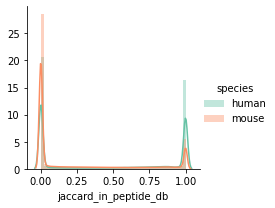

In [111]:
g = sns.FacetGrid(data=combined_scores, hue='species', palette='Set2')
g.map(sns.distplot, 'jaccard_in_peptide_db')
g.add_legend()

In [115]:
# Compute accuracy/F1 scores

NameError: name 'grouped' is not defined

In [ ]:
## Human F1, accuracy, etc...scores

In [112]:
%%time

score_names = 'accuracy', 'f1', 'jaccard', 'precision', 'recall',  


metrics = {
    'f1_score': sklearn.metrics.f1_score,
    'accuracy_score': sklearn.metrics.accuracy_score,
    'jaccard_score': sklearn.metrics.jaccard_score,
    'precision_score': sklearn.metrics.precision_score,
    'recall_score': sklearn.metrics.recall_score,
    'f2_score': lambda x, y: sklearn.metrics.fbeta_score(x, y, beta=2),
    'f_12_score': lambda x, y: sklearn.metrics.fbeta_score(x, y, beta=1/2),
}

def score_coding_metrics(coding_results, true_coding_frame=true_coding_frame, metrics=metrics, is_coding_col='is_coding'):

    dfs = []
    for score_name, scorer in tqdm(metrics.items()):
        print(f'score_name: {score_name}')
    #     scorer = sklearn.metrics.get_scorer(score_name)
        grouped = coding_results.groupby(['species', 'alphabet', 'ksize'])
        scores = grouped[is_coding_col].apply(
            lambda x: scorer(true_coding_frame[x.index], x))

        scores.name = 'score_value'
        scores_df = scores.reset_index()
        scores_df['score_name'] = score_name
        dfs.append(scores_df)
    metrics_df = pd.concat(dfs)
    return metrics_df

CPU times: user 84 µs, sys: 32 µs, total: 116 µs
Wall time: 149 µs


In [63]:
score_records = [list(itertools.chain(itertools.chain(*x.keys()), x.values())) for x in combined_metrics.score_value]
metrics_reshaped = pd.DataFrame(score_records, columns=['species', 'alphabet', 'ksize', 'score_value'])
metrics_reshaped['score_name'] = combined_metrics['score_name'].values
describe(metrics_reshaped)

  0%|          | 0/5 [00:00<?, ?it/s]

score_name: f1_score


 20%|██        | 1/5 [02:38<10:33, 158.40s/it]

score_name: accuracy_score


 40%|████      | 2/5 [04:56<07:37, 152.44s/it]

score_name: jaccard_score


 60%|██████    | 3/5 [07:34<05:08, 154.12s/it]

score_name: precision_score


 80%|████████  | 4/5 [10:12<02:35, 155.20s/it]

score_name: recall_score


100%|██████████| 5/5 [12:49<00:00, 153.96s/it]

(540, 5)
CPU times: user 12min 10s, sys: 38.9 s, total: 12min 49s
Wall time: 12min 49s


,species,alphabet,ksize,score_value,score_name
2611,platypus,dayhoff,24,0.017147,jaccard_score
2981,bat,dayhoff,16,0.000000,precision_score
4684,rhino,protein,18,0.000000,recall_score
4366,koala,protein,24,0.000000,recall_score
689,platypus,protein,19,0.013574,f1_score


### Write combined metrics to csv!!!

In [108]:
csv = '/home/olga/data_lg/data_sm_copy/immune-evolution/pipeline-results/human-simulated/combined-across-species/busco_mammalia_coding_scores_metrics.csv'
! mkdir -p /home/olga/data_lg/data_sm_copy/immune-evolution/pipeline-results/human-simulated/combined-across-species/
metrics_reshaped.to_csv(csv, index=False)

In [65]:
combined_metrics.head()

,species,alphabet,ksize,score_value,score_name
0,human,dayhoff,5,0.618421,f1_score
1,human,dayhoff,6,0.619225,f1_score
2,human,dayhoff,7,0.633816,f1_score
3,human,dayhoff,8,0.693704,f1_score
4,human,dayhoff,9,0.778995,f1_score


## Compute ROC AUC

'1.1.2'

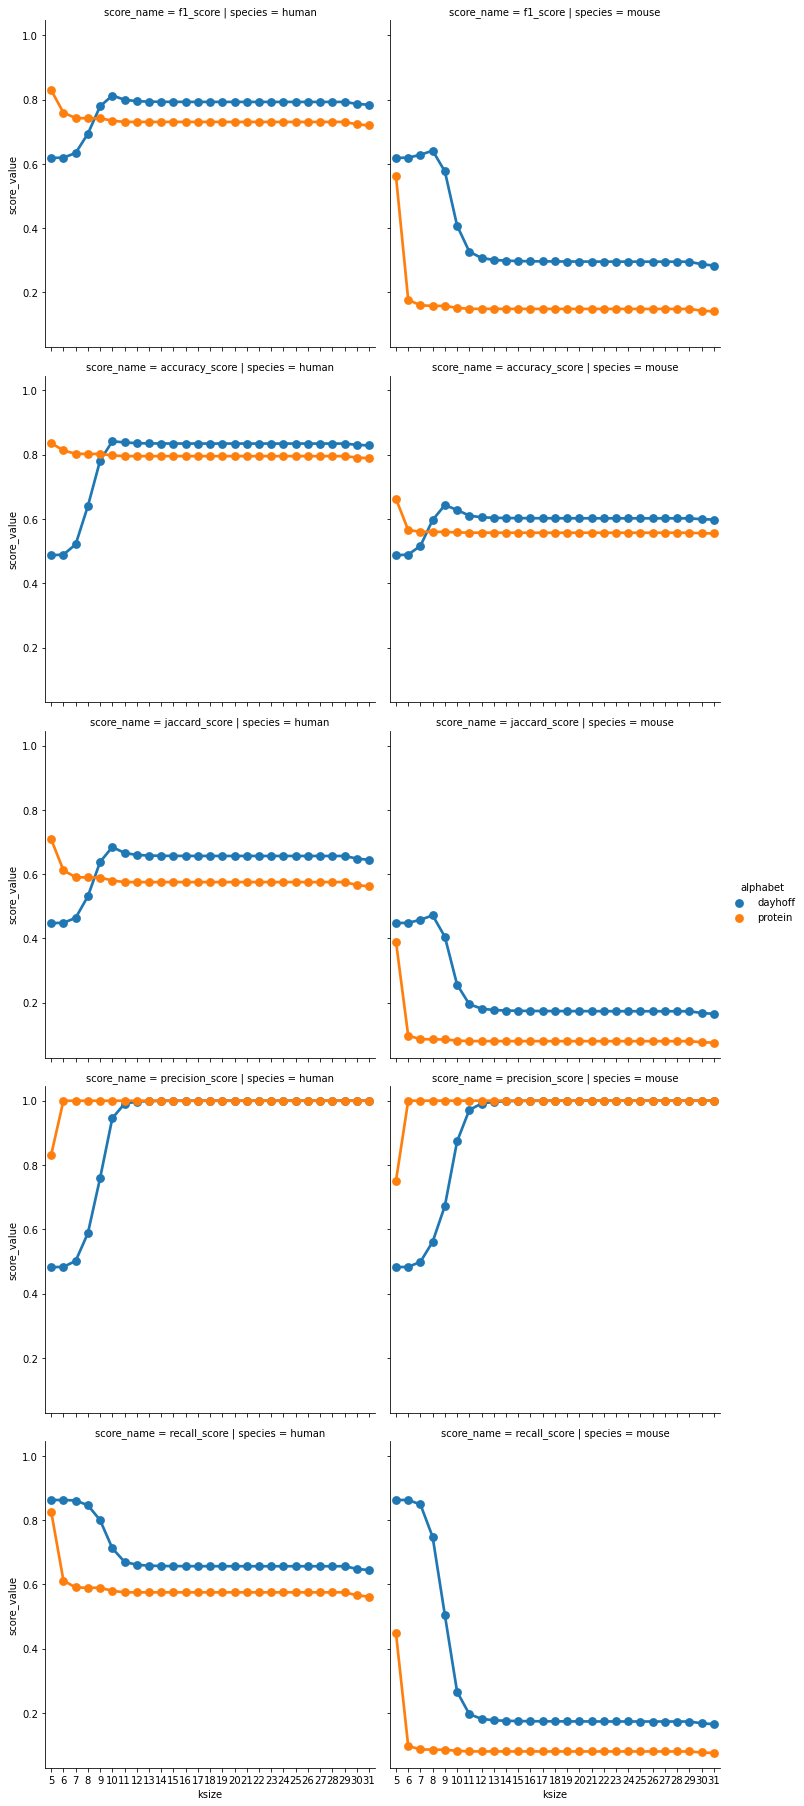

In [111]:
pd.__version__

In [115]:
grouped

NameError: name 'grouped' is not defined

In [121]:
%%time

def compute_roc_auc(coding_results, true_coding_frame=true_coding_frame):
    scores = coding_results.groupby(
        ['species', 'alphabet', 'ksize']
    ).jaccard_in_peptide_db.apply(
        lambda x: sklearn.metrics.roc_auc_score(true_coding_frame[x.index], x))

    scores.name = 'score_value'
    scores_df = scores.reset_index()
    scores_df['score_name'] = 'roc_auc'

    return scores_df

combined_roc_auc_score = compute_roc_auc(combined_scores)
combined_roc_auc_score.head()

CPU times: user 18min 36s, sys: 9min 38s, total: 28min 14s
Wall time: 28min 20s


,species,alphabet,ksize,score_value,score_name
0,baiji,dayhoff,5,0.397805,roc_auc
1,baiji,dayhoff,6,0.363173,roc_auc
2,baiji,dayhoff,7,0.363950,roc_auc
3,baiji,dayhoff,8,0.385517,roc_auc
4,baiji,dayhoff,9,0.418185,roc_auc


### Write to file!!

In [125]:
csv = '/home/olga/data_lg/data_sm_copy/immune-evolution/pipeline-results/human-simulated/combined-across-species/busco_mammalia_coding_scores_roc_auc_score.csv'
combined_roc_auc_score.to_csv(csv, index=False)


## Compute ROC Curve

In [122]:
%%time

def _get_roc_curve_df(y_true, y_score):
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
    
    df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
    df.index.name = 'threshold_i'
    return df



def compute_roc_curve(coding_results, true_coding_frame=true_coding_frame):
    curve_df = coding_results.groupby(['species', 'alphabet', 'ksize']).jaccard_in_peptide_db.apply(
        lambda x: _get_roc_curve_df(true_coding_frame[x.index], x))

    curve_df['score_name'] = 'roc_auc'

    return curve_df

combined_roc_curve = compute_roc_curve(combined_scores)
combined_roc_curve = combined_roc_curve.reset_index()
describe(combined_roc_curve)

(116855, 8)
--- First 5 entries ---


,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name
0,baiji,dayhoff,5,0,0.000000,0.000000,2.000000,roc_auc
1,baiji,dayhoff,5,1,0.000820,0.000705,1.000000,roc_auc
2,baiji,dayhoff,5,2,0.000820,0.000717,0.977778,roc_auc
3,baiji,dayhoff,5,3,0.000825,0.000726,0.977273,roc_auc
4,baiji,dayhoff,5,4,0.000842,0.000742,0.976744,roc_auc


--- Random subset ---


,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name
76238,platypus,dayhoff,6,108,0.964324,0.976589,0.827586,roc_auc
1057,baiji,dayhoff,6,467,0.750466,0.571013,0.190476,roc_auc
68659,night_monkey,dayhoff,14,19,0.000211,0.256666,0.942857,roc_auc
81103,platypus,dayhoff,21,3,0.000000,0.017151,0.965517,roc_auc
100670,shrew,dayhoff,15,96,0.000429,0.004093,0.230769,roc_auc


CPU times: user 19min 13s, sys: 46.4 s, total: 19min 59s
Wall time: 20min 1s


In [126]:
csv = '/home/olga/data_lg/data_sm_copy/immune-evolution/pipeline-results/human-simulated/combined-across-species/busco_mammalia_coding_scores_roc_curves.csv'
combined_roc_curve.to_csv(csv, index=False)

In [127]:
parquet = '/home/olga/data_lg/data_sm_copy/immune-evolution/pipeline-results/human-simulated/combined-across-species/busco_mammalia_coding_scores_roc_curves.parquet'
combined_roc_curve.to_parquet(parquet, index=False)

# Concatenate ROC AUC with other metrics

## Combine non-curve sscores

In [79]:
combined_roc_auc.loc[combined_roc_auc.groupby(['species', 'score_name',]).score_value.idxmax()]

,species,alphabet,ksize,score_value,score_name
30,human,protein,8,0.998859,roc_auc
84,mouse,protein,8,0.924263,roc_auc


In [80]:
combined_roc_curve.query('(species == "human") & (alphabet == "protein") & (ksize == 11)')

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name
7997,human,protein,11,0,0.000000,0.000000,2.000000,roc_auc
7998,human,protein,11,1,0.000037,0.561638,1.000000,roc_auc
7999,human,protein,11,2,0.000054,0.566188,0.975000,roc_auc
8000,human,protein,11,3,0.000082,0.575268,0.974359,roc_auc
8001,human,protein,11,4,0.000082,0.575280,0.973684,roc_auc
...,...,...,...,...,...,...,...,...
8189,human,protein,11,192,0.003672,0.997711,0.027027,roc_auc
8190,human,protein,11,193,0.003689,0.997711,0.026316,roc_auc
8191,human,protein,11,194,0.004912,0.997726,0.025641,roc_auc
8192,human,protein,11,195,0.005481,0.997741,0.025000,roc_auc


In [81]:
# combined_roc_curve.

In [82]:
combined_roc_curve.query('(species == "mouse") & (alphabet == "protein") & (ksize == 9)')

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name
17873,mouse,protein,9,0,0.000000,0.000000,2.000000,roc_auc
17874,mouse,protein,9,1,0.000000,0.075918,1.000000,roc_auc
17875,mouse,protein,9,2,0.000000,0.077414,0.976190,roc_auc
17876,mouse,protein,9,3,0.000000,0.080569,0.975610,roc_auc
17877,mouse,protein,9,4,0.000000,0.080587,0.972973,roc_auc
...,...,...,...,...,...,...,...,...
18197,mouse,protein,9,324,0.010091,0.801787,0.025641,roc_auc
18198,mouse,protein,9,325,0.010142,0.801794,0.025000,roc_auc
18199,mouse,protein,9,326,0.018832,0.821107,0.024390,roc_auc
18200,mouse,protein,9,327,0.023150,0.831228,0.023810,roc_auc


In [83]:
combined_roc_curve.query('(species == "mouse") & (alphabet == "dayhoff") & (ksize == 16)')

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name
13740,mouse,dayhoff,16,0,0.000000,0.000000,2.000000,roc_auc
13741,mouse,dayhoff,16,1,0.000045,0.166045,1.000000,roc_auc
13742,mouse,dayhoff,16,2,0.000048,0.168714,0.971429,roc_auc
13743,mouse,dayhoff,16,3,0.000048,0.174257,0.970588,roc_auc
13744,mouse,dayhoff,16,4,0.000048,0.174260,0.969697,roc_auc
...,...,...,...,...,...,...,...,...
14056,mouse,dayhoff,16,316,0.088959,0.754582,0.031250,roc_auc
14057,mouse,dayhoff,16,317,0.088964,0.754582,0.030303,roc_auc
14058,mouse,dayhoff,16,318,0.117757,0.773285,0.029412,roc_auc
14059,mouse,dayhoff,16,319,0.132169,0.782581,0.028571,roc_auc


In [84]:
# combined_roc_curve.loc[[('human', 'protein', 11), ('mouse', 'protein', 9), ('mouse', 'dayhoff', 11)], :]

## Plot combined metrics

### Groupby score name, one by one

In [83]:
combined_roc_curve.query('(species == "mouse") & (alphabet == "dayhoff") & (ksize == 16)')

species alphabet  ksize  threshold_i       fpr       tpr  thresholds  \
13740   mouse  dayhoff     16            0  0.000000  0.000000    2.000000   
13741   mouse  dayhoff     16            1  0.000045  0.166045    1.000000   
13742   mouse  dayhoff     16            2  0.000048  0.168714    0.971429   
13743   mouse  dayhoff     16            3  0.000048  0.174257    0.970588   
13744   mouse  dayhoff     16            4  0.000048  0.174260    0.969697   
...       ...      ...    ...          ...       ...       ...         ...   
14056   mouse  dayhoff     16          316  0.088959  0.754582    0.031250   
14057   mouse  dayhoff     16          317  0.088964  0.754582    0.030303   
14058   mouse  dayhoff     16          318  0.117757  0.773285    0.029412   
14059   mouse  dayhoff     16          319  0.132169  0.782581    0.028571   
14060   mouse  dayhoff     16          320  1.000000  1.000000    0.000000   

      score_name  
13740    roc_auc  
13741    roc_auc  
13742    roc_auc  
13743    roc_auc  
13744    roc_auc  
...          ...  
14056    roc_auc  
14057    roc_auc  
14058    roc_auc  
14059    roc_auc  
14060    roc_auc  

[321 rows x 8 columns]

In [84]:
# combined_roc_curve.loc[[('human', 'protein', 11), ('mouse', 'protein', 9), ('mouse', 'dayhoff', 11)], :]

## Plot combined metrics

### Groupby score name, one by one

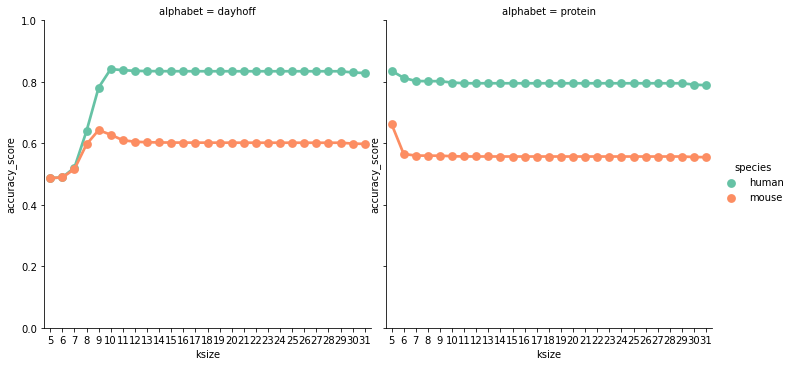

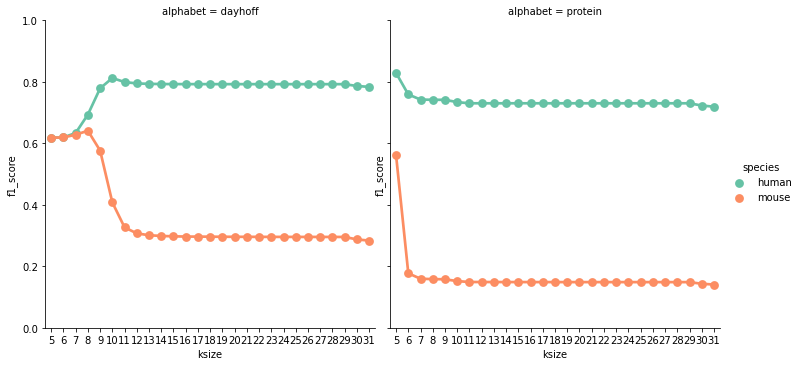

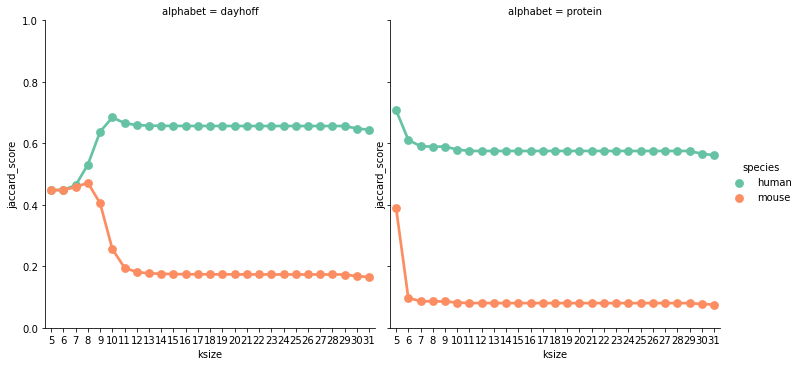

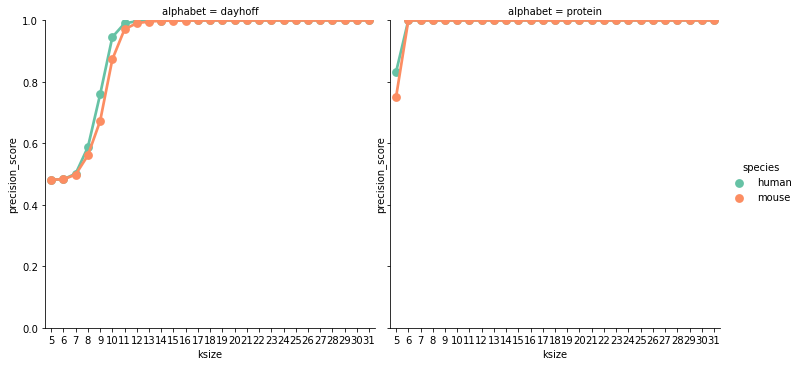

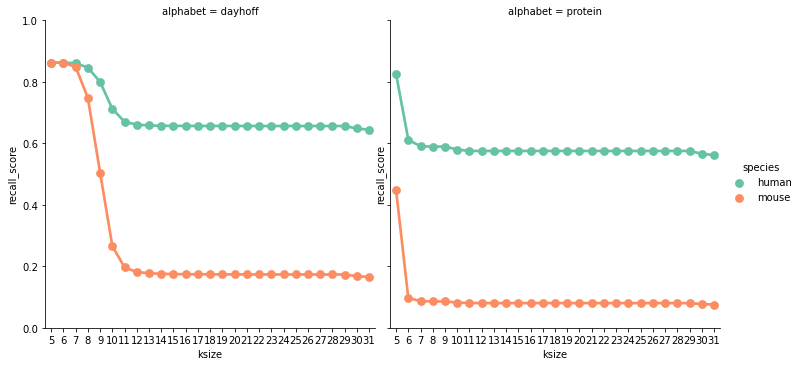

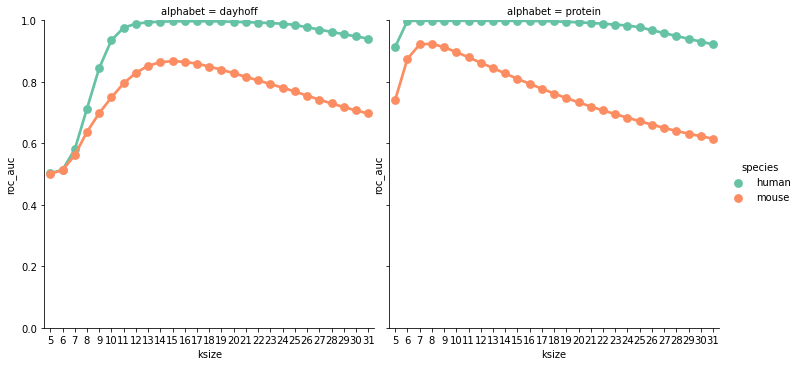

In [85]:
for score_name, df in concatenated_metrics.groupby('score_name'):
    g = sns.catplot(x='ksize', y='score_value', hue='species', col='alphabet', 
            data=df, kind='point', palette="Set2")
    g.set(ylabel=score_name, ylim=(0, 1))

## Just plot ROC AUC for proteins

In [167]:
combined_roc_auc_protein = combined_roc_auc.copy()#.query('alphabet == "protein"')
combined_roc_auc_protein = combined_roc_auc_protein.rename(columns={'species': 'reference_proteome'})

In [169]:
FIGURE_FOLDER = os.path.join('..', 'figures')
! mkdir $FIGURE_FOLDER

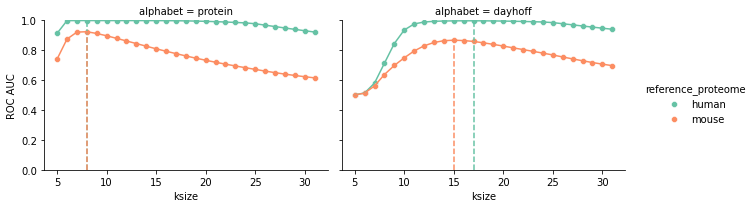

In [171]:
def plot_argmax(x, y, *args, **kwargs):
    idxmax = y.idxmax()
    plt.vlines(x[idxmax], 0, y.max(), linestyle='--', *args, **kwargs)
#     print('x:', x)
#     print('y:', y)
#     print('args:', args)
#     print('kwargs:', kwargs)
    pass

# alphabet_order = ['protein', 'dayhoff']
g = sns.FacetGrid( hue='reference_proteome', col='alphabet', col_order=alphabet_order,
        data=combined_roc_auc_protein, palette="Set2", height=3, aspect=1.5)
g.map(sns.scatterplot, 'ksize', 'score_value')
g.add_legend()
g.map(plt.plot, 'ksize', 'score_value')
g.map(plot_argmax, 'ksize', 'score_value')
g.set(ylabel='ROC AUC', ylim=(0, 1))

pdf = os.path.join(FIGURE_FOLDER, 'leaftea_translate__human_mouse__roc_auc__protein_dayhoff.pdf')
g.savefig(pdf)

### All in one grid

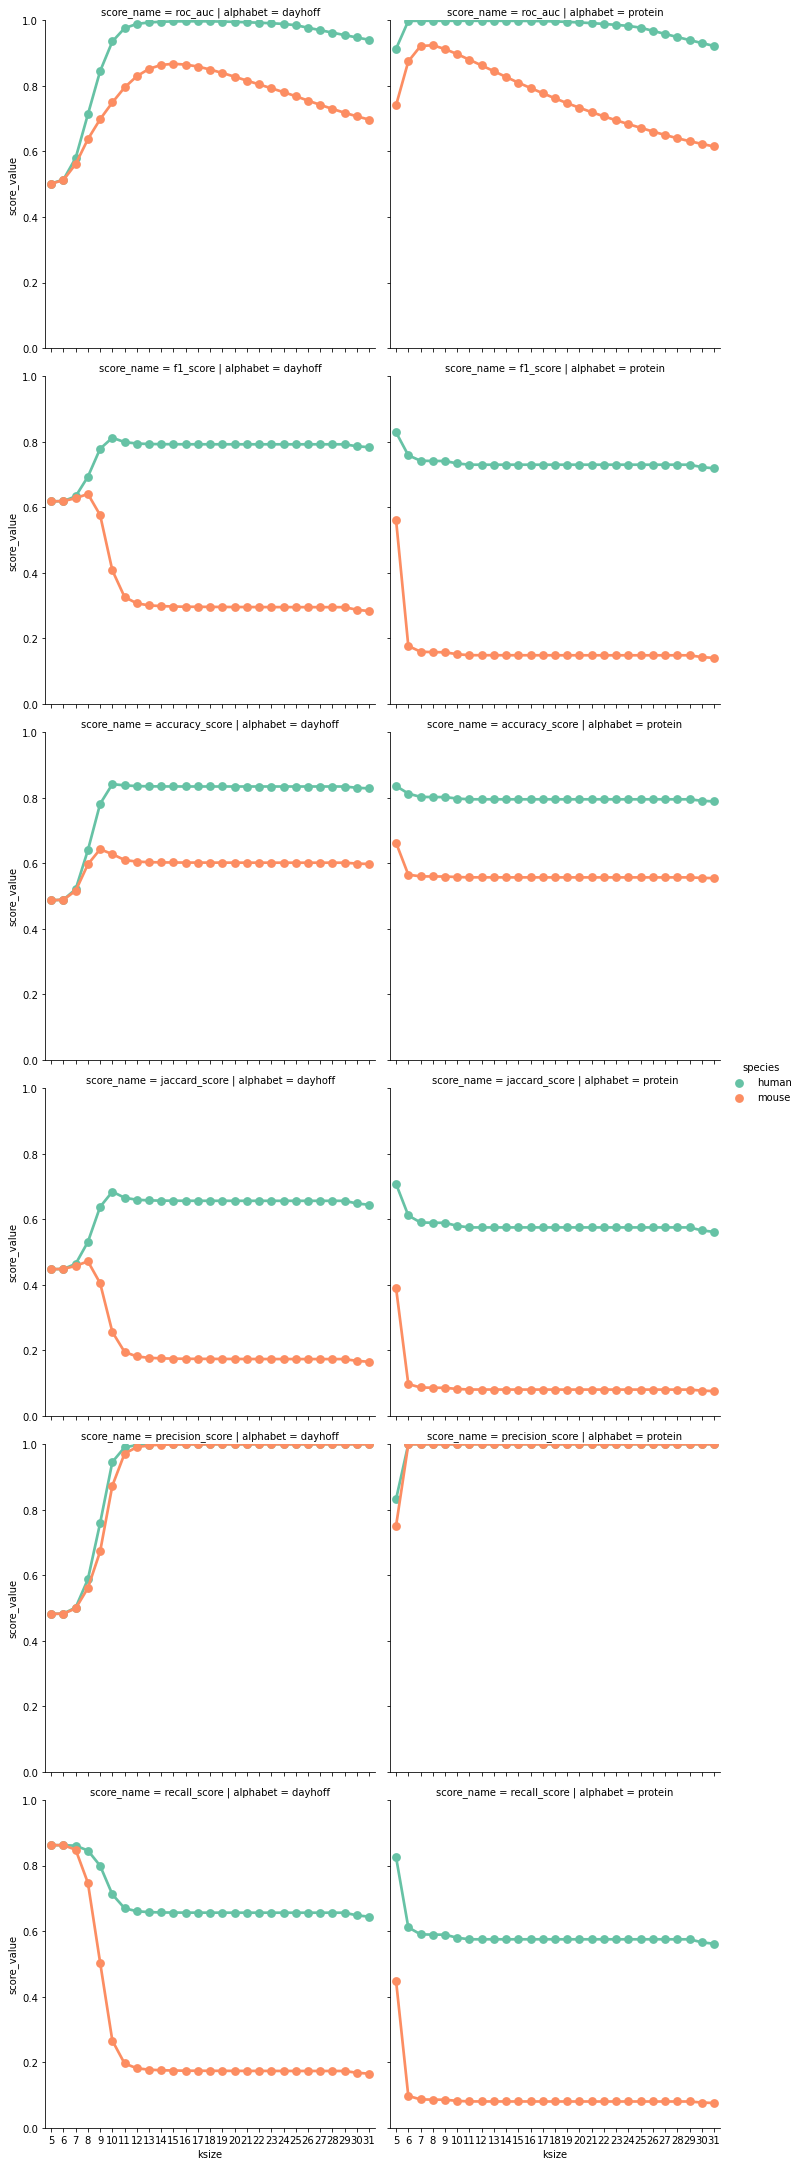

In [87]:
g = sns.catplot(x='ksize', y='score_value', hue='species', col='alphabet', 
        data=concatenated_metrics, kind='point', palette='Set2', row='score_name')
g.set(ylim=(0, 1 ))

## Plot ROC curves

### Plot combined roc curves

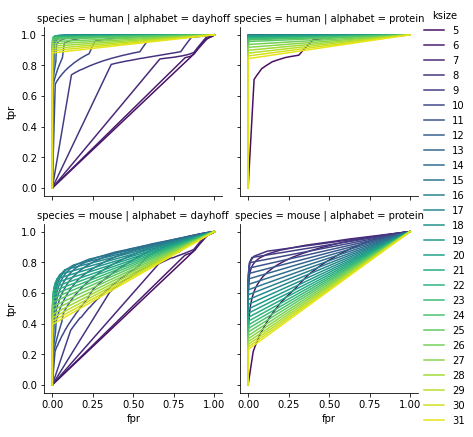

In [88]:

g = sns.FacetGrid(data=combined_roc_curve, col='alphabet', hue='ksize', palette='viridis', row='species')
g.map(plt.plot, 'fpr', 'tpr')
g.add_legend()

### Plot combined roc curves - protein only


In [145]:
combined_roc_curve_protein = combined_roc_curve.query('alphabet == "protein"')
print(combined_roc_curve_protein.shape)
combined_roc_curve_protein.head()

(8446, 9)


,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
5902,human,protein,5,0,0.000000,0.000000,2.000000,roc_auc,NaN
5903,human,protein,5,1,0.036804,0.708045,1.000000,roc_auc,19.238294
5904,human,protein,5,2,0.052248,0.732880,0.978261,roc_auc,1.608052
5905,human,protein,5,3,0.085270,0.780887,0.977778,roc_auc,1.453777
5906,human,protein,5,4,0.086958,0.781397,0.977273,roc_auc,0.302141


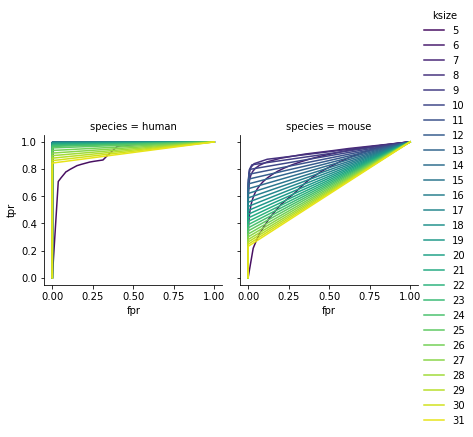

In [146]:

g = sns.FacetGrid(data=combined_roc_curve_protein, hue='ksize', palette='viridis', col='species')
g.map(plt.plot, 'fpr', 'tpr')
g.add_legend()

## Get derivative/difference of ROC curve

In [89]:
roc_derivatives = combined_roc_curve.groupby(['species', 'alphabet', 'ksize']).apply(lambda x: x.tpr.diff()/x.fpr.diff())
print(roc_derivatives.shape)
roc_derivatives.head()

(20553,)


species  alphabet  ksize   
human    dayhoff   5      0         NaN
                          1    1.001064
                          2    1.303111
                          3    1.192568
                          4    0.892619
dtype: float64

In [90]:
combined_roc_curve.shape

(20553, 8)

## What species, alphabet, ksize maximizes the derivative

In [91]:
combined_roc_curve['roc_derivative'] = roc_derivatives.values
print(combined_roc_curve.shape)
combined_roc_curve.head()

(20553, 9)


,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
0,human,dayhoff,5,0,0.000000,0.000000,2.000000,roc_auc,NaN
1,human,dayhoff,5,1,0.850723,0.851628,1.000000,roc_auc,1.001064


--- Random subset ---


species alphabet  ksize  threshold_i       fpr       tpr  thresholds  \
0   human  dayhoff      5            0  0.000000  0.000000    2.000000   
1   human  dayhoff      5            1  0.850723  0.851628    1.000000   
2   human  dayhoff      5            2  0.851483  0.852619    0.978261   
3   human  dayhoff      5            3  0.853505  0.855029    0.977778   
4   human  dayhoff      5            4  0.854536  0.855950    0.977273   

  score_name  roc_derivative  
0    roc_auc             NaN  
1    roc_auc        1.001064  
2    roc_auc        1.303111  
3    roc_auc        1.192568  
4    roc_auc        0.892619

In [92]:
combined_roc_auc.loc[combined_roc_auc.groupby(['species', 'score_name',]).score_value.idxmax()]

,species,alphabet,ksize,score_value,score_name
30,human,protein,8,0.998859,roc_auc
84,mouse,protein,8,0.924263,roc_auc


### What threshold to use?

In [93]:
combined_roc_curve.loc[combined_roc_curve.query('tpr >= 0.9').groupby(['species', 'alphabet']).roc_derivative.idxmax()]

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
153,human,dayhoff,5,153,0.998623,0.999112,0.757576,roc_auc,inf
6026,human,protein,5,124,0.645914,0.989237,0.807692,roc_auc,inf
10107,mouse,dayhoff,5,177,0.999545,0.999611,0.717949,roc_auc,inf
16344,mouse,protein,5,209,0.938280,0.991548,0.657895,roc_auc,inf


In [94]:
combined_roc_curve.loc[combined_roc_curve.groupby(['species', 'alphabet']).roc_derivative.idxmax()]

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
153,human,dayhoff,5,153,0.998623,0.999112,0.757576,roc_auc,inf
5924,human,protein,5,22,0.088900,0.782135,0.961538,roc_auc,inf
10107,mouse,dayhoff,5,177,0.999545,0.999611,0.717949,roc_auc,inf
16344,mouse,protein,5,209,0.938280,0.991548,0.657895,roc_auc,inf


### What about with a true positive rate > some value?

In [95]:
combined_roc_curve.loc[combined_roc_curve.query('(tpr >= 0.8) & (fpr < 0.1)').groupby(['species', 'alphabet']).roc_derivative.idxmax()]

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
2435,human,dayhoff,12,216,0.071409,0.973155,0.520000,roc_auc,inf
6282,human,protein,6,70,0.000476,0.901492,0.862069,roc_auc,inf
17407,mouse,protein,7,388,0.043113,0.804361,0.133333,roc_auc,inf


In [96]:
combined_roc_curve.loc[combined_roc_curve.query('(tpr >= 0.9) & (fpr < 0.1)').groupby(['species', 'alphabet']).roc_derivative.idxmax()]

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
2435,human,dayhoff,12,216,0.071409,0.973155,0.520000,roc_auc,inf
6282,human,protein,6,70,0.000476,0.901492,0.862069,roc_auc,inf


In [97]:
combined_roc_curve.loc[combined_roc_curve.query('(tpr >= 0.95) & (fpr < 0.1)').groupby(['species', 'alphabet']).roc_derivative.idxmax()]

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
2435,human,dayhoff,12,216,0.071409,0.973155,0.520,roc_auc,inf
6357,human,protein,6,145,0.004529,0.985752,0.725,roc_auc,inf


In [98]:

combined_roc_curve.query('(tpr >= 0.8) & (fpr < 0.1)').groupby(['species', 'alphabet', 'ksize']).roc_derivative.apply(lambda x: x.nlargest(3))


species  alphabet  ksize       
human    dayhoff   11     1922      9.429728
                          1926      7.932131
                          1898      3.218856
                   12     2435           inf
                          2358     33.741329
                                     ...    
mouse    protein   8      17838     3.677114
                          17837     3.557798
                   9      18189          inf
                          18187     8.244825
                          18200     2.344422
Name: roc_derivative, Length: 150, dtype: float64

In [102]:
combined_roc_curve_k8 = combined_roc_curve.query('(ksize == 8) & (alphabet == "protein")')
combined_roc_curve_k8.head()

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
7155,human,protein,8,0,0.000000,0.000000,2.000000,roc_auc,NaN
7156,human,protein,8,1,0.000037,0.561704,1.000000,roc_auc,1.533298e+04
7157,human,protein,8,2,0.000054,0.566261,0.976744,roc_auc,2.695048e+02
7158,human,protein,8,3,0.000082,0.575363,0.976190,roc_auc,3.229748e+02
7159,human,protein,8,4,0.000082,0.575396,0.975610,roc_auc,inf


In [104]:
combined_roc_curve_k8.loc[combined_roc_curve_k8.query('(tpr > 0.8) & (fpr < 0.1)').groupby(['species', 'alphabet']).roc_derivative.idxmax()]

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
7222,human,protein,8,67,0.000178,0.891418,0.805556,roc_auc,inf
17858,mouse,protein,8,372,0.036270,0.839330,0.034483,roc_auc,inf


In [108]:
combined_roc_curve_k8.query('thresholds < 0.1')

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
7452,human,protein,8,297,0.008981,0.997741,0.097561,roc_auc,0.000000
7453,human,protein,8,298,0.008987,0.997741,0.096774,roc_auc,0.000000
7454,human,protein,8,299,0.011641,0.997741,0.095238,roc_auc,0.000000
7455,human,protein,8,300,0.012836,0.997747,0.093023,roc_auc,0.005082
7456,human,protein,8,301,0.012842,0.997747,0.086957,roc_auc,0.000000
...,...,...,...,...,...,...,...,...,...
17868,mouse,protein,8,382,0.036823,0.839445,0.025000,roc_auc,0.765451
17869,mouse,protein,8,383,0.036924,0.839466,0.024390,roc_auc,0.209475
17870,mouse,protein,8,384,0.090838,0.861388,0.023810,roc_auc,0.406606
17871,mouse,protein,8,385,0.117797,0.872113,0.023256,roc_auc,0.397837


In [109]:
combined_roc_curve_k8.query('(tpr > 0.8) & (fpr < 0.1) & (species == "mouse")')

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,roc_derivative
17837,mouse,protein,8,351,0.015254,0.804946,0.071429,roc_auc,3.557798
17838,mouse,protein,8,352,0.017463,0.813070,0.069767,roc_auc,3.677114
17839,mouse,protein,8,353,0.017466,0.813073,0.066667,roc_auc,1.077301
17840,mouse,protein,8,354,0.017474,0.813076,0.064516,roc_auc,0.359100
17841,mouse,protein,8,355,0.017477,0.813079,0.062500,roc_auc,1.077301
17842,mouse,protein,8,356,0.017480,0.813079,0.060606,roc_auc,0.000000
17843,mouse,protein,8,357,0.017483,0.813085,0.058824,roc_auc,2.154602
17844,mouse,protein,8,358,0.017505,0.813094,0.057143,roc_auc,0.403988
17845,mouse,protein,8,359,0.017542,0.813100,0.055556,roc_auc,0.165739
17846,mouse,protein,8,360,0.017590,0.813103,0.054054,roc_auc,0.063371


# Test various jaccard thresholds

In [ ]:
%%time

containment_thresholds = np.arange(0.01, 1, 0.01)

dfs = []
for threshold in containment_thresholds:
    is_coding_col = f'is_coding_thresh={threshold:.2f}'
    combined_scores[is_coding_col] = combined_scores['jaccard_in_peptide_db'] > threshold
    
    df = score_coding_metrics(combined_scores, is_coding_col=is_coding_col)
    df['containment_threshold'] = threshold
    dfs.append(df)
containment_threshold_metrics = pd.concat(dfs, ignore_index=True)

score_name: f1_score


In [ ]:
containment_threshold_metrics.shape

In [118]:
1+1

2

In [121]:
containment_threshold_metrics.head()

,species,alphabet,ksize,score_value,score_name,containment_threshold
0,human,dayhoff,5,0.650350,f1_score,0.01
1,human,dayhoff,6,0.650048,f1_score,0.01
2,human,dayhoff,7,0.649947,f1_score,0.01
3,human,dayhoff,8,0.649930,f1_score,0.01
4,human,dayhoff,9,0.649933,f1_score,0.01


In [123]:
containment_threshold_metrics_protein8 = containment_threshold_metrics.query('(alphabet == "protein") & (ksize == 8)')
print(containment_threshold_metrics_protein8.shape)
containment_threshold_metrics_protein8.head()

(1386, 6)


,species,alphabet,ksize,score_value,score_name,containment_threshold
30,human,protein,8,0.932976,f1_score,0.01
84,mouse,protein,8,0.872542,f1_score,0.01
138,human,protein,8,0.930957,accuracy_score,0.01
192,mouse,protein,8,0.877346,accuracy_score,0.01
246,human,protein,8,0.874372,jaccard_score,0.01


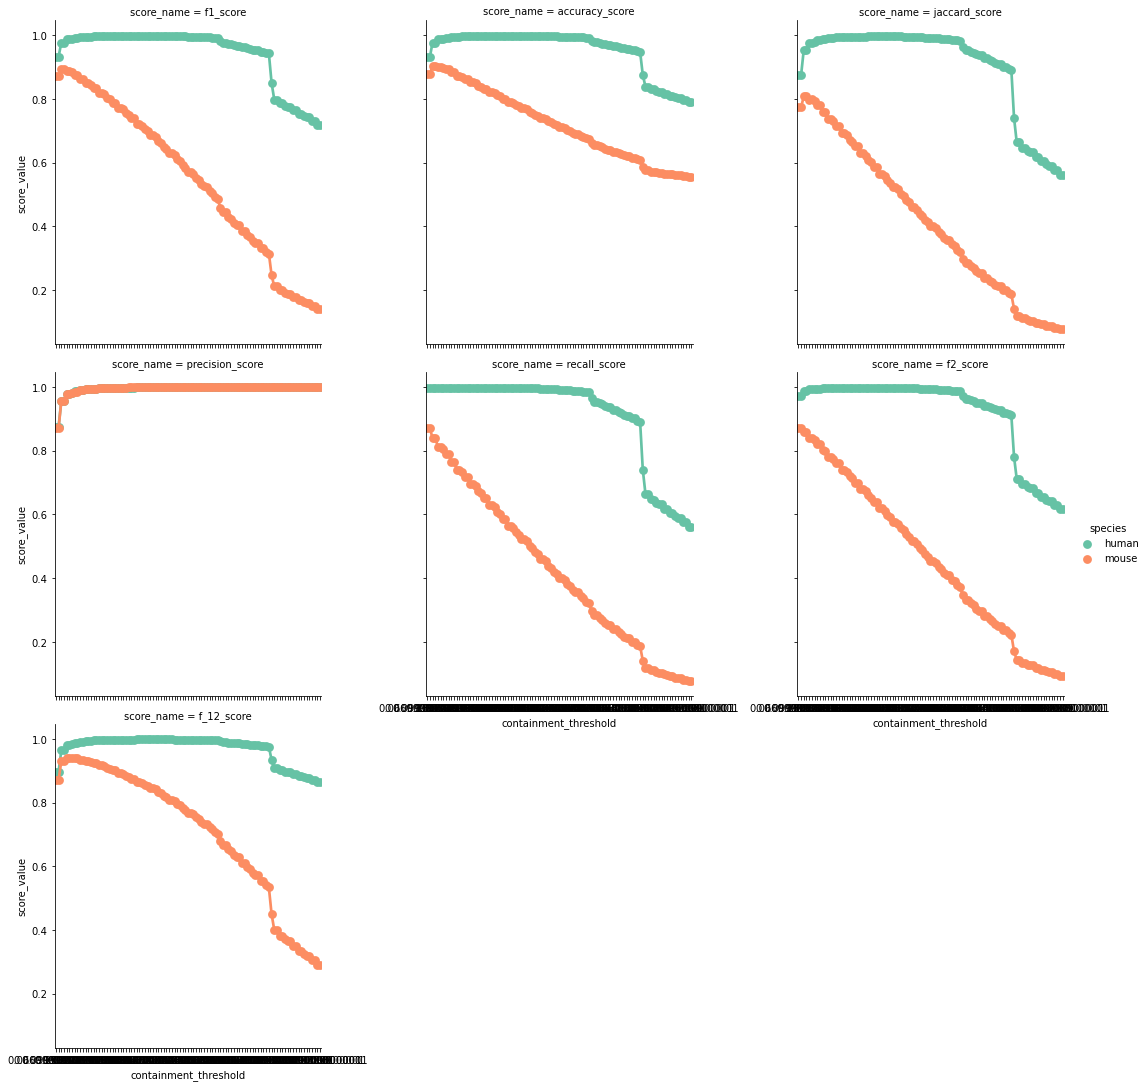

In [125]:
sns.catplot(
    x='containment_threshold', 
    y='score_value', 
    data=containment_threshold_metrics_protein8, 
    hue='species', 
    col='score_name', 
    col_wrap=3,
    palette='Set2',
    kind='point',
)

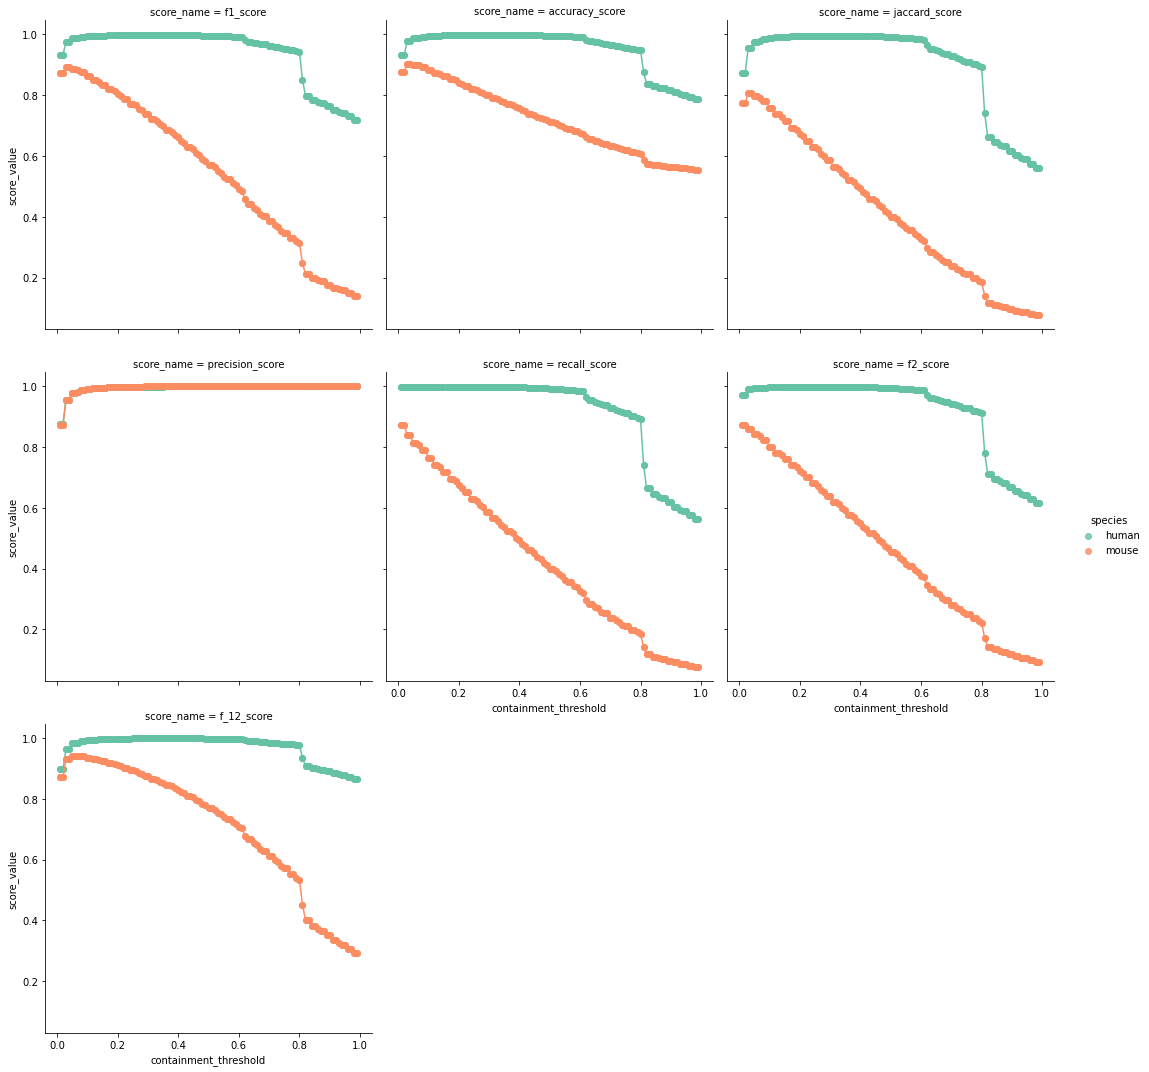

In [129]:
g = sns.lmplot(
    x='containment_threshold', 
    y='score_value', 
    data=containment_threshold_metrics_protein8, 
    hue='species', 
    col='score_name', 
    col_wrap=3,
    palette='Set2',
    fit_reg=False,
#     kind='point',
)
g.map(plt.plot, 'containment_threshold', 'score_value')

In [126]:
rows = containment_threshold_metrics_protein8.groupby(['species', 'score_name']).apply(lambda x: x['score_value'].idxmax())
containment_threshold_metrics_protein8.loc[rows]

,species,alphabet,ksize,score_value,score_name,containment_threshold
23574,human,protein,8,0.998164,accuracy_score,0.32
23466,human,protein,8,0.998092,f1_score,0.32
18714,human,protein,8,0.997771,f2_score,0.25
29406,human,protein,8,0.998632,f_12_score,0.39
23682,human,protein,8,0.996192,jaccard_score,0.32
73686,human,protein,8,0.999930,precision_score,0.98
462,human,protein,8,0.998230,recall_score,0.01
2460,mouse,protein,8,0.903856,accuracy_score,0.04
2352,mouse,protein,8,0.893674,f1_score,0.04
624,mouse,protein,8,0.872285,f2_score,0.01


## Protein, k=8, only $F_{1/2}$ and precision recall

In [154]:
score_names = ['precision_score', 'recall_score', 'f1_score', 'f_12_score',]
containment_threshold_metrics_protein8_f12_precision_recall = containment_threshold_metrics_protein8.query('score_name in @score_names')
containment_threshold_metrics_protein8_f12_precision_recall

,species,alphabet,ksize,score_value,score_name,containment_threshold
30,human,protein,8,0.932976,f1_score,0.01
84,mouse,protein,8,0.872542,f1_score,0.01
354,human,protein,8,0.875729,precision_score,0.01
408,mouse,protein,8,0.872972,precision_score,0.01
462,human,protein,8,0.998230,recall_score,0.01
...,...,...,...,...,...,...
74496,mouse,protein,8,1.000000,precision_score,0.99
74550,human,protein,8,0.561704,recall_score,0.99
74604,mouse,protein,8,0.075996,recall_score,0.99
74766,human,protein,8,0.864966,f_12_score,0.99


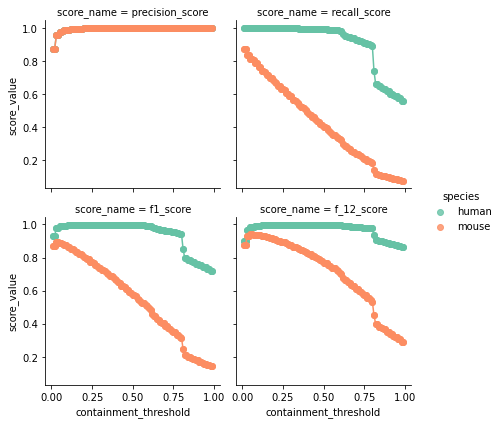

In [155]:
g = sns.lmplot(
    x='containment_threshold', 
    y='score_value', 
    data=containment_threshold_metrics_protein8_f12_precision_recall, 
    hue='species', 
    col='score_name', 
    col_wrap=2,
    palette='Set2',
    fit_reg=False,
    col_order=score_names,
    height=3,
#     scatter_kws=dict(markersize=5),
#     kind='point',
)
g.map(plt.plot, 'containment_threshold', 'score_value', linestyle='-')

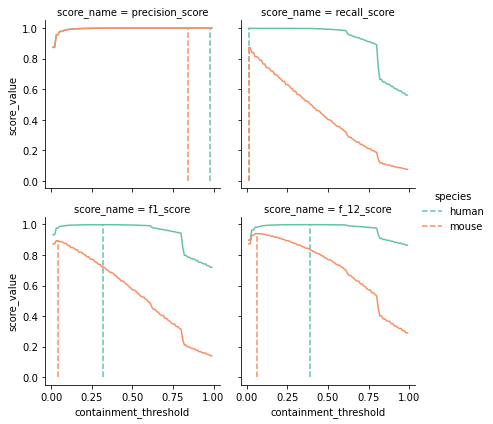

In [164]:
g = sns.FacetGrid(
#     x='containment_threshold', 
#     y='score_value', 
    data=containment_threshold_metrics_protein8_f12_precision_recall, 
    hue='species', 
    col='score_name', 
    col_wrap=2,
    palette='Set2',
    col_order=score_names,
    height=3,
)
g.map(plt.plot, 'containment_threshold', 'score_value', linestyle='-')
g.map(plot_argmax, 'containment_threshold', 'score_value')

g.add_legend()

### Plot only precision and recall

In [161]:
precision_recall = 'precision_score', 'recall_score'
containment_threshold_metrics_protein8_precision_recall = containment_threshold_metrics_protein8_f12_precision_recall.query('score_name in @precision_recall')
containment_threshold_metrics_protein8_precision_recall.shape

(396, 6)

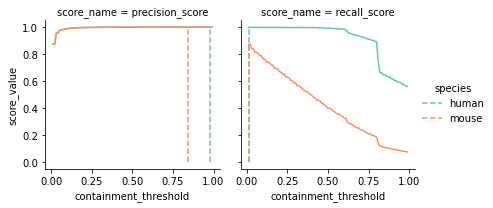

In [163]:
def plot_argmax(x, y, *args, **kwargs):
    idxmax = y.idxmax()
    plt.vlines(x[idxmax], 0, y.max(), linestyle='--', *args, **kwargs)
#     print('x:', x)
#     print('y:', y)
#     print('args:', args)
#     print('kwargs:', kwargs)
    pass

g = sns.FacetGrid(
#     x='containment_threshold', 
#     y='score_value', 
    data=containment_threshold_metrics_protein8_precision_recall, 
    hue='species', 
    col='score_name', 
    col_wrap=2,
    palette='Set2',
    col_order=precision_recall,
    height=3,
)
g.map(plt.plot, 'containment_threshold', 'score_value', linestyle='-')
g.add_legend()

## Get derivative/difference of 

In [ ]:
containment_threshold_metrics.shape

In [118]:
1+1

2

In [121]:
containment_threshold_metrics.head()

,species,alphabet,ksize,score_value,score_name,containment_threshold
0,human,dayhoff,5,0.650350,f1_score,0.01
1,human,dayhoff,6,0.650048,f1_score,0.01
2,human,dayhoff,7,0.649947,f1_score,0.01
3,human,dayhoff,8,0.649930,f1_score,0.01
4,human,dayhoff,9,0.649933,f1_score,0.01


In [123]:
containment_threshold_metrics_protein8 = containment_threshold_metrics.query('(alphabet == "protein") & (ksize == 8)')
print(containment_threshold_metrics_protein8.shape)
containment_threshold_metrics_protein8.head()

(1386, 6)


,species,alphabet,ksize,score_value,score_name,containment_threshold
30,human,protein,8,0.932976,f1_score,0.01
84,mouse,protein,8,0.872542,f1_score,0.01
138,human,protein,8,0.930957,accuracy_score,0.01
192,mouse,protein,8,0.877346,accuracy_score,0.01
246,human,protein,8,0.874372,jaccard_score,0.01


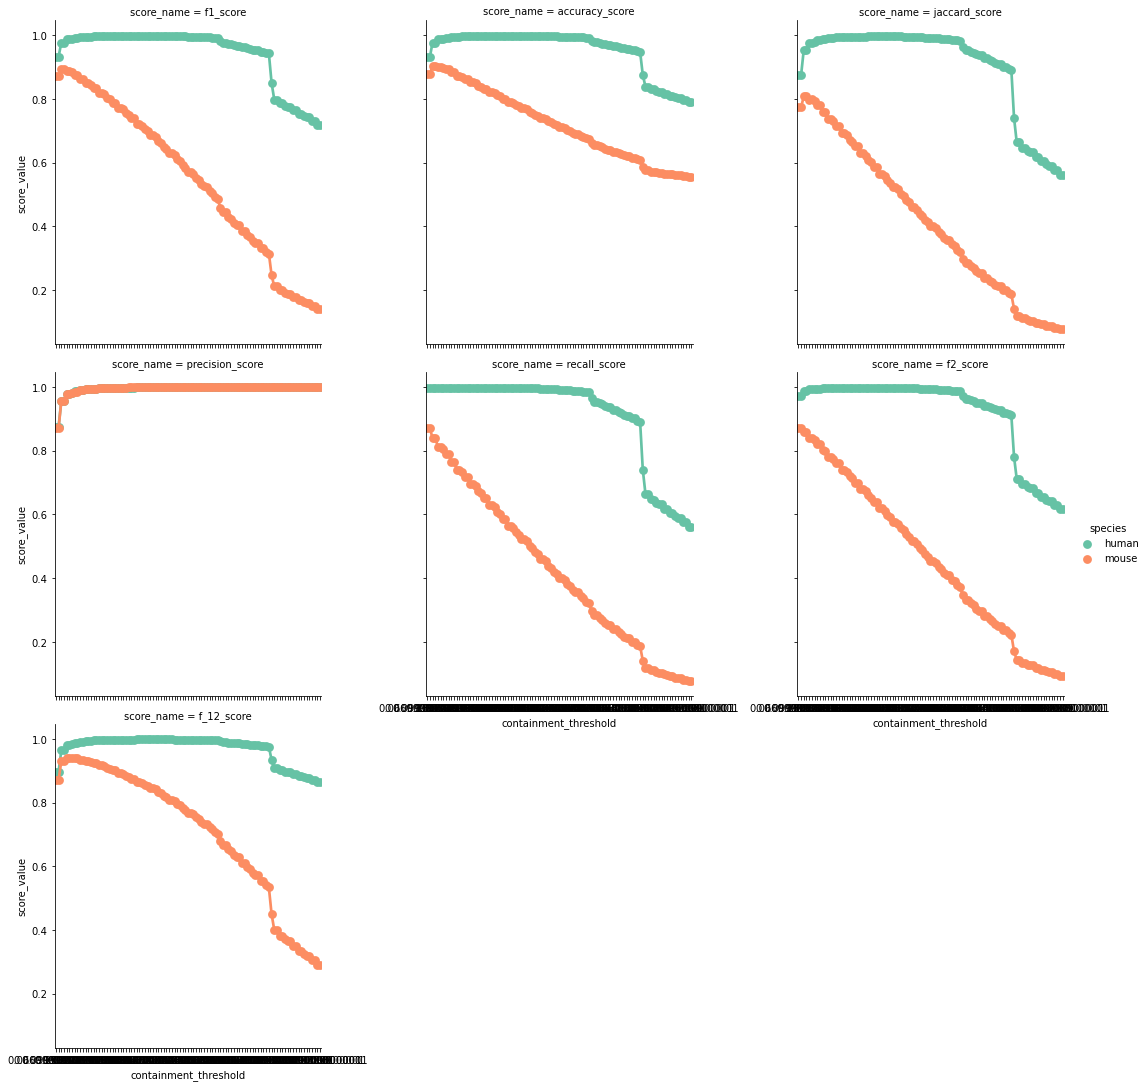

In [125]:
sns.catplot(
    x='containment_threshold', 
    y='score_value', 
    data=containment_threshold_metrics_protein8, 
    hue='species', 
    col='score_name', 
    col_wrap=3,
    palette='Set2',
    kind='point',
)

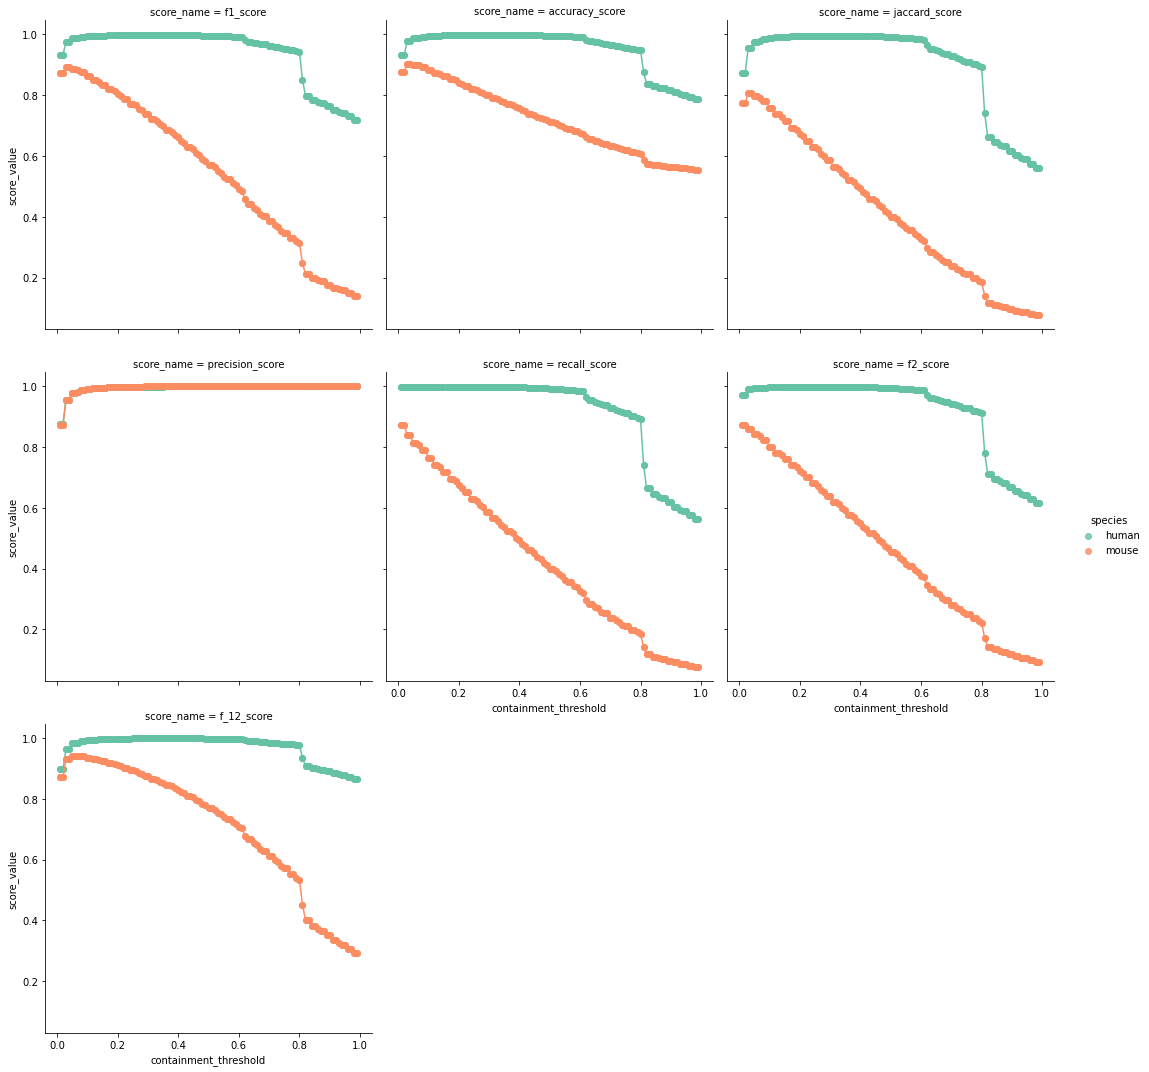

In [129]:
g = sns.lmplot(
    x='containment_threshold', 
    y='score_value', 
    data=containment_threshold_metrics_protein8, 
    hue='species', 
    col='score_name', 
    col_wrap=3,
    palette='Set2',
    fit_reg=False,
#     kind='point',
)
g.map(plt.plot, 'containment_threshold', 'score_value')

In [126]:
rows = containment_threshold_metrics_protein8.groupby(['species', 'score_name']).apply(lambda x: x['score_value'].idxmax())
containment_threshold_metrics_protein8.loc[rows]

,species,alphabet,ksize,score_value,score_name,containment_threshold
23574,human,protein,8,0.998164,accuracy_score,0.32
23466,human,protein,8,0.998092,f1_score,0.32
18714,human,protein,8,0.997771,f2_score,0.25
29406,human,protein,8,0.998632,f_12_score,0.39
23682,human,protein,8,0.996192,jaccard_score,0.32
73686,human,protein,8,0.999930,precision_score,0.98
462,human,protein,8,0.998230,recall_score,0.01
2460,mouse,protein,8,0.903856,accuracy_score,0.04
2352,mouse,protein,8,0.893674,f1_score,0.04
624,mouse,protein,8,0.872285,f2_score,0.01


## Protein, k=8, only $F_{1/2}$ and precision recall

In [154]:
score_names = ['precision_score', 'recall_score', 'f1_score', 'f_12_score',]
containment_threshold_metrics_protein8_f12_precision_recall = containment_threshold_metrics_protein8.query('score_name in @score_names')
containment_threshold_metrics_protein8_f12_precision_recall

,species,alphabet,ksize,score_value,score_name,containment_threshold
30,human,protein,8,0.932976,f1_score,0.01
84,mouse,protein,8,0.872542,f1_score,0.01
354,human,protein,8,0.875729,precision_score,0.01
408,mouse,protein,8,0.872972,precision_score,0.01
462,human,protein,8,0.998230,recall_score,0.01
...,...,...,...,...,...,...
74496,mouse,protein,8,1.000000,precision_score,0.99
74550,human,protein,8,0.561704,recall_score,0.99
74604,mouse,protein,8,0.075996,recall_score,0.99
74766,human,protein,8,0.864966,f_12_score,0.99


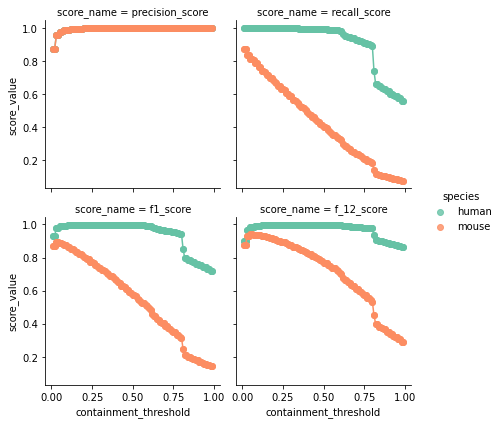

In [155]:
g = sns.lmplot(
    x='containment_threshold', 
    y='score_value', 
    data=containment_threshold_metrics_protein8_f12_precision_recall, 
    hue='species', 
    col='score_name', 
    col_wrap=2,
    palette='Set2',
    fit_reg=False,
    col_order=score_names,
    height=3,
#     scatter_kws=dict(markersize=5),
#     kind='point',
)
g.map(plt.plot, 'containment_threshold', 'score_value', linestyle='-')

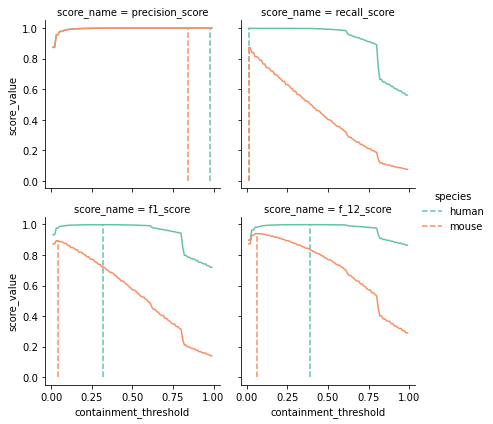

In [164]:
g = sns.FacetGrid(
#     x='containment_threshold', 
#     y='score_value', 
    data=containment_threshold_metrics_protein8_f12_precision_recall, 
    hue='species', 
    col='score_name', 
    col_wrap=2,
    palette='Set2',
    col_order=score_names,
    height=3,
)
g.map(plt.plot, 'containment_threshold', 'score_value', linestyle='-')
g.map(plot_argmax, 'containment_threshold', 'score_value')

g.add_legend()

### Plot only precision and recall

In [161]:
precision_recall = 'precision_score', 'recall_score'
containment_threshold_metrics_protein8_precision_recall = containment_threshold_metrics_protein8_f12_precision_recall.query('score_name in @precision_recall')
containment_threshold_metrics_protein8_precision_recall.shape

(396, 6)

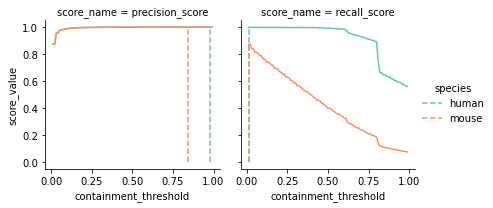

In [163]:
def plot_argmax(x, y, *args, **kwargs):
    idxmax = y.idxmax()
    plt.vlines(x[idxmax], 0, y.max(), linestyle='--', *args, **kwargs)
#     print('x:', x)
#     print('y:', y)
#     print('args:', args)
#     print('kwargs:', kwargs)
    pass

g = sns.FacetGrid(
#     x='containment_threshold', 
#     y='score_value', 
    data=containment_threshold_metrics_protein8_precision_recall, 
    hue='species', 
    col='score_name', 
    col_wrap=2,
    palette='Set2',
    col_order=precision_recall,
    height=3,
)
g.map(plt.plot, 'containment_threshold', 'score_value', linestyle='-')
g.add_legend()